<a href="https://colab.research.google.com/github/MatiasH2804/Proyecto-Parte-III-Henqu-n/blob/main/ProyectoParteIII%2BHenqu%C3%ADn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AN√ÅLISIS EXPLORATORIO Y MODELAJE DE PRECIOS DE AUTOM√ìVILES EN ARGENTINA

### Entregable Final
**Curso de Data Science I ‚Äî CoderHouse**  
**Mat√≠as Henqu√≠n**  
**Fecha de entrega: 24/07/2025**

Este trabajo aplica t√©cnicas de selecci√≥n de caracter√≠sticas, entrenamiento de modelos de regresi√≥n, evaluaci√≥n de m√©tricas y visualizaci√≥n para explorar y predecir precios de autos publicados en Argentina.



# **Introducci√≥n y Contexto**

En este notebook desarrollamos el trabajo final de √©ste curso. El objetivo general es aplicar herramientas de an√°lisis exploratorio, reducci√≥n de dimensionalidad, y evaluaci√≥n de m√©tricas, para arribar a conclusiones sobre un dataset real de autos de nuestra naci√≥n.

El dataset que utilizamos contiene informaci√≥n de autos publicados para la venta en Argentina, en el a√±o 2023; incluyendo variables como: marca, modelo, a√±o, tipo de cuerpo, tipo de combustible, cantidad de kil√≥metros, entre otros.

La particularidad del conjunto de datos es que fue previamente limpiado y ajustado (por nosotros) para reflejar precios m√°s realistas en d√≥lares, creando una nueva columna llamada **Precio Dolarizado**. A partir de esta base, nos enfocamos en analizar alg√∫nas marcas del mercado nacional, analizando precios entre autos nuevos y usados, cantidad de autos por marca, etc.

## **Objetivos espec√≠ficos de esta secci√≥n**

Realizar una exploraci√≥n visual de los datos.  
Analizar relaciones entre variables clave (precio, marca, estado, tipo de caja).  
Establecer hip√≥tesis para luego validar con modelos.  

A lo largo del Colab, cada secci√≥n estar√° documentada, comentando los criterios usados y justificando cada decisi√≥n, de modo quese pueda entender bien el camino tomado en el an√°lisis.



#**1. Importaci√≥n de librer√≠as**

### En esta celda agrupamos todas las librer√≠as necesarias para el proyecto.
### Esto nos permite mantener el c√≥digo organizado y evitar errores futuros relacionados con funciones no definidas.

#####pandas: para manejar y explorar los datos en formato de tabla (DataFrames).
#####numpy: para realizar operaciones num√©ricas y manejar arrays.
#####matplotlib.pyplot: para crear gr√°ficos cl√°sicos (l√≠neas, barras, etc.).
#####seaborn: para hacer gr√°ficos estad√≠sticos m√°s visuales y estilizados.
#####seaborn.objects: para gr√°ficos m√°s flexibles y modernos con el nuevo sistema de objetos.
#####train_test_split (de sklearn): para separar los datos en entrenamiento y prueba.
#####LinearRegression (de sklearn): para crear un modelo de regresi√≥n lineal.
#####m√©tricas de sklearn: para evaluar el rendimiento del modelo (MAE, MSE y R¬≤).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#**2. Importaci√≥n del DF del Drive**
Ahora, lo que hacemos, es buscar en el drive el dataset con el que vamos a trabajar


In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
spreadsheet = gc.open("Autos De Argentina")
worksheet = spreadsheet.sheet1
df = pd.DataFrame(worksheet.get_all_records())
df.head()

Marca         Modelo   A√±o        Color Combustible  Puertas  \
0   Toyota  Corolla Cross  2022     Plateado       Nafta       50   
1     Jeep        Compass  2022       Blanco       Nafta       50   
2     Jeep        Compass  2022  Gris oscuro       Nafta       50   
3  Citro√´n      C4 Cactus  2022  Gris oscuro       Nafta       50   
4   Toyota        Corolla  2019         Gris       Nafta       40   

  Caja de cambio Motor Tipo de cuerpo  kilometros de uso   Moneda     Precio  
0     Autom√°tica                  SUV                500  d√≥lares        7.5  
1     Autom√°tica   2.4            SUV                500  d√≥lares        8.6  
2     Autom√°tica   2.4            SUV                500  d√≥lares        8.6  
3     Autom√°tica                  SUV                550  d√≥lares        7.9  
4         Manual   1.8          Sed√°n               9000    pesos  5000000.0

#**3. "EDA": Analisis exploratorio y de limpieza de datos**

### En las siguientes secciones realizar√© una serie de operaciones tendientes a corregir errores com√∫nes que aparecen en las bases de datos.
De √©sta manera se intenta normalizar la base de datos antes de trabajar con ella.


In [ ]:
# Detectar datos faltantes
print(df.isnull().sum())
# Convertir a num√©rico solo la columna que corresponde
df['kilometros de uso'] = pd.to_numeric(df['kilometros de uso'], errors='coerce')
# Eliminar filas con datos faltantes
df = df.dropna()
# Verificar nuevamente
print(df.isnull().sum())
# Vista previa del DataFrame
df.head()

Marca                0
Modelo               0
A√±o                  0
Color                0
Combustible          0
Puertas              0
Caja de cambio       0
Motor                0
Tipo de cuerpo       0
kilometros de uso    0
Moneda               0
Precio               0
dtype: int64
Marca                0
Modelo               0
A√±o                  0
Color                0
Combustible          0
Puertas              0
Caja de cambio       0
Motor                0
Tipo de cuerpo       0
kilometros de uso    0
Moneda               0
Precio               0
dtype: int64


Marca         Modelo   A√±o        Color Combustible  Puertas  \
0   Toyota  Corolla Cross  2022     Plateado       Nafta       50   
1     Jeep        Compass  2022       Blanco       Nafta       50   
2     Jeep        Compass  2022  Gris oscuro       Nafta       50   
3  Citro√´n      C4 Cactus  2022  Gris oscuro       Nafta       50   
4   Toyota        Corolla  2019         Gris       Nafta       40   

  Caja de cambio Motor Tipo de cuerpo  kilometros de uso   Moneda     Precio  
0     Autom√°tica                  SUV                500  d√≥lares        7.5  
1     Autom√°tica   2.4            SUV                500  d√≥lares        8.6  
2     Autom√°tica   2.4            SUV                500  d√≥lares        8.6  
3     Autom√°tica                  SUV                550  d√≥lares        7.9  
4         Manual   1.8          Sed√°n               9000    pesos  5000000.0

En este paso se crea una columna unificada en d√≥lares reales, llamada "Precio Dolarizado". La base ten√≠a precios tanto en pesos como en d√≥lares, as√≠ que se convierten todos a una misma unidad, actualizados a d√≥lar 2023. Luego se eliminan las columnas originales para evitar confusi√≥n y se muestra un ejemplo de los datos procesados.

In [ ]:
# Volvemos a cargar el DataFrame desde la hoja de c√°lculo (por si fue modificado antes)
df = pd.DataFrame(worksheet.get_all_records())
# Asegurarse que los nombres de columnas est√©n en min√∫sculas y sin espacios
df.columns = df.columns.str.strip().str.lower()
# Creamos la columna final con precios dolarizados
df['Precio Dolarizado'] = df.apply(lambda fila: float(fila['precio']) / 1000 if fila['moneda'].strip().lower() == 'pesos'else float(fila['precio']) * 1000, axis=1)
# Eliminamos las columnas originales 'precio' y 'moneda'
df.drop(columns=['precio', 'moneda'], inplace=True)
# Mostramos el resultado
df.head()


marca         modelo   a√±o        color combustible  puertas  \
0   Toyota  Corolla Cross  2022     Plateado       Nafta       50   
1     Jeep        Compass  2022       Blanco       Nafta       50   
2     Jeep        Compass  2022  Gris oscuro       Nafta       50   
3  Citro√´n      C4 Cactus  2022  Gris oscuro       Nafta       50   
4   Toyota        Corolla  2019         Gris       Nafta       40   

  caja de cambio motor tipo de cuerpo  kilometros de uso  Precio Dolarizado  
0     Autom√°tica                  SUV                500             7500.0  
1     Autom√°tica   2.4            SUV                500             8600.0  
2     Autom√°tica   2.4            SUV                500             8600.0  
3     Autom√°tica                  SUV                550             7900.0  
4         Manual   1.8          Sed√°n               9000             5000.0

Algunos registros tienen cantidades absurdas como 10, 20 o 30 puertas. Se convierten esos valores por su correspondiente sin ceros finales (por ejemplo, 10 pasa a 1), asumiendo que son errores de carga. Tambi√©n se fuerza el tipo num√©rico para evitar problemas posteriores en el an√°lisis.

In [ ]:
# Convertir 'puertas' a n√∫mero por si hay strings
df['puertas'] = pd.to_numeric(df['puertas'], errors='coerce')
# Reemplazar valores tipo 10, 20, 30, ... por su correspondiente sin el cero
df['puertas'] = df['puertas'].apply(lambda x: x // 10 if x in [10, 20, 30, 40, 50] else x)
# Verificar resultado
df['puertas'].value_counts()
df.head()

marca         modelo   a√±o        color combustible  puertas  \
0   Toyota  Corolla Cross  2022     Plateado       Nafta        5   
1     Jeep        Compass  2022       Blanco       Nafta        5   
2     Jeep        Compass  2022  Gris oscuro       Nafta        5   
3  Citro√´n      C4 Cactus  2022  Gris oscuro       Nafta        5   
4   Toyota        Corolla  2019         Gris       Nafta        4   

  caja de cambio motor tipo de cuerpo  kilometros de uso  Precio Dolarizado  
0     Autom√°tica                  SUV                500             7500.0  
1     Autom√°tica   2.4            SUV                500             8600.0  
2     Autom√°tica   2.4            SUV                500             8600.0  
3     Autom√°tica                  SUV                550             7900.0  
4         Manual   1.8          Sed√°n               9000             5000.0

Las columnas de tipo categ√≥rico (como color, tipo de combustible, motor, etc.) se limpian reemplazando espacios vac√≠os por NaN y luego se rellenan con la etiqueta **"Sin_Dato"**, para que no afecten en los modelos ni en los gr√°ficos posteriores.

In [ ]:
# Lista de columnas categ√≥ricas a completar
columnas_a_rellenar = ['color', 'combustible', 'caja de cambio', 'motor', 'tipo de cuerpo']
for col in columnas_a_rellenar:
    df[col] = df[col].replace(r'^\s*$', pd.NA, regex=True)
    # Reemplazar NA con 'Sin_Dato'
    df[col] = df[col].fillna('Sin_Dato')
df.head()

marca         modelo   a√±o        color combustible  puertas  \
0   Toyota  Corolla Cross  2022     Plateado       Nafta        5   
1     Jeep        Compass  2022       Blanco       Nafta        5   
2     Jeep        Compass  2022  Gris oscuro       Nafta        5   
3  Citro√´n      C4 Cactus  2022  Gris oscuro       Nafta        5   
4   Toyota        Corolla  2019         Gris       Nafta        4   

  caja de cambio     motor tipo de cuerpo  kilometros de uso  \
0     Autom√°tica  Sin_Dato            SUV                500   
1     Autom√°tica       2.4            SUV                500   
2     Autom√°tica       2.4            SUV                500   
3     Autom√°tica  Sin_Dato            SUV                550   
4         Manual       1.8          Sed√°n               9000   

   Precio Dolarizado  
0             7500.0  
1             8600.0  
2             8600.0  
3             7900.0  
4             5000.0

#**4. An√°lisis gr√°fico de las variables**

A continuaci√≥n, se presentan distintos gr√°ficos que nos permitir√°n identificar patrones, detectar valores at√≠picos y comprender mejor la estructura del dataset.

## 4.1 Distribuci√≥n de autos por tipo de carrocer√≠a

Este primer gr√°fico nos muestra la **cantidad de autos disponibles seg√∫n el tipo de carrocer√≠a**. Esta informaci√≥n es √∫til para entender qu√© formatos predominan en el dataset, y tambi√©n para observar si hay alg√∫n tipo subrepresentado que pueda afectar el an√°lisis posterior (por ejemplo, SUV, sed√°n, hatchback, etc.).


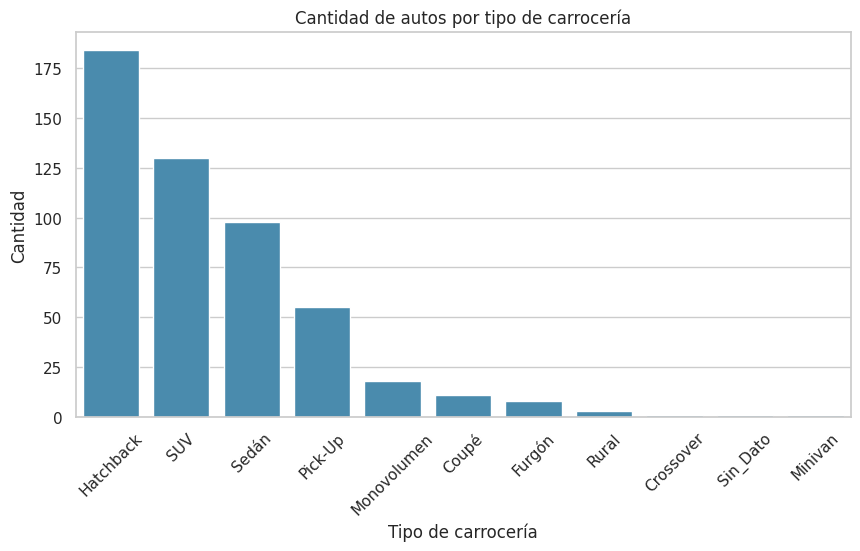

In [ ]:
sns.set(style="whitegrid", palette=["#3990BE"])
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='tipo de cuerpo', order=df['tipo de cuerpo'].value_counts().index, color="#3990BE")
plt.title("Cantidad de autos por tipo de carrocer√≠a")
plt.xticks(rotation=45)
plt.xlabel("Tipo de carrocer√≠a")
plt.ylabel("Cantidad")
plt.show()

**Conclusi√≥n**  
Podemos observar que ciertos tipos de carrocer√≠a (como los SUV y los sedanes y los hatchback) tienen una representaci√≥n mucho mayor que otros. Esta informaci√≥n ser√° √∫til para futuras segmentaciones o para evaluar si el tipo de carrocer√≠a influye en el precio de los veh√≠culos.


## 4.2  Distribuci√≥n de precios por marca (Top 10)

Ahora nos interesa observar c√≥mo se distribuyen los precios dentro de las marcas m√°s representadas del dataset. Para esto, filtraremos las 10 marcas con mayor cantidad de registros y analizaremos visualmente su comportamiento de precios usando un gr√°fico de viol√≠n, que adem√°s de mostrar el rango, permite visualizar la densidad y simetr√≠a de los valores.


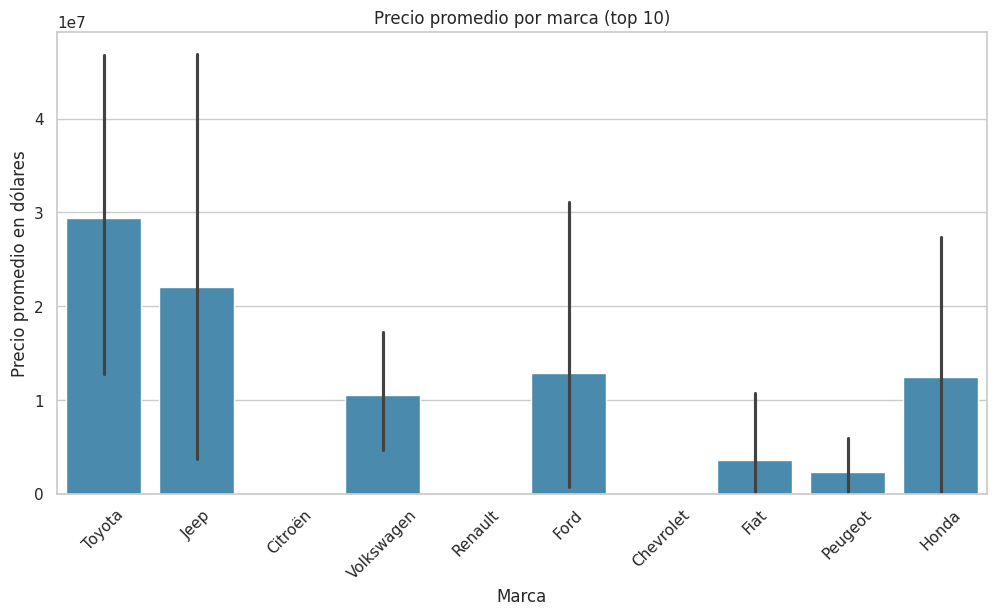

In [ ]:
# Promedio de precios por marca (top 10)
plt.figure(figsize=(12,6))
top_marcas = df['marca'].value_counts().head(10).index
sns.barplot(data=df[df['marca'].isin(top_marcas)], x='marca', y='Precio Dolarizado', estimator='mean')
plt.title("Precio promedio por marca (top 10)")
plt.ylabel("Precio promedio en d√≥lares")
plt.xlabel("Marca")
plt.xticks(rotation=45)
plt.show()
# Modificar grafico a violin

**Conclusi√≥n**

Observamos que marcas como **Toyota** y **Jeep** se destacan por tener los precios promedios m√°s altos entre las m√°s vendidas, mientras que marcas como **Fiat** y **Peugeot** presentan precios considerablemente m√°s bajos. Esta informaci√≥n resulta √∫til para segmentar el an√°lisis en funci√≥n de gamas o posicionamiento de mercado.


## 4.3 Distribuci√≥n general de precios en USD

Antes de analizar precios por categor√≠as espec√≠ficas, es √∫til observar c√≥mo est√°n distribuidos en general los valores del dataset. Esto nos permite detectar comportamientos globales, como la existencia de valores extremos, la concentraci√≥n de precios o la forma general de la distribuci√≥n.

Para ello, utilizamos un **histograma con curva de densidad** que nos muestra cu√°ntos autos hay para cada rango de precios.


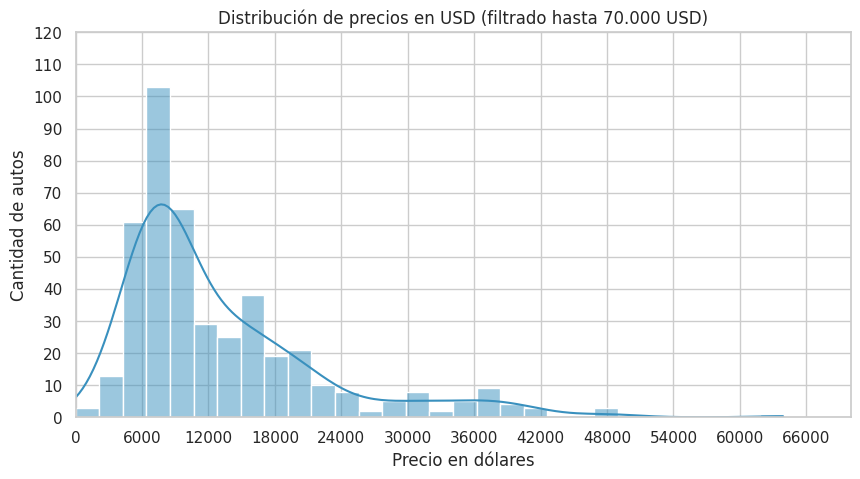

In [ ]:
# Gr√°fico de distribuci√≥n general de precios (sin outliers extremos)
plt.figure(figsize=(10, 5))
# Filtrar precios razonables (hasta 70.000 USD)
df_filtrado = df[df['Precio Dolarizado'] <= 70000]
# Crear histograma + curva KDE
sns.histplot(df_filtrado['Precio Dolarizado'], bins=30, kde=True, color="#3990BE")
# Personalizar ejes
plt.title("Distribuci√≥n de precios en USD (filtrado hasta 70.000 USD)")
plt.xlabel("Precio en d√≥lares")
plt.ylabel("Cantidad de autos")
# Eje Y: ticks de a 10
plt.yticks(np.arange(0, 121, 10))
# Eje X: ticks de a 2.000 USD
plt.xticks(np.arange(0, 70001, 6000))
# Limitar eje X
plt.xlim(0, 70000)
plt.show()

**Conclusi√≥n**
He decidido analizar precios menores a 70mil d√≥lares, debido a que hay valores que son irracionales

"# Filtrar precios razonables (hasta 70.000 USD)
df_filtrado = df[df['Precio Dolarizado'] <= 70000]"

La mayor√≠a de los autos disponibles en la base se concentran entre los 6.000 y 15.000 d√≥lares, lo que refleja un mercado con fuerte presencia de veh√≠culos econ√≥micos. La curva est√° sesgada hacia la derecha, lo que indica que hay unidades con precios considerablemente m√°s altos. Estos valores extremos, aunque pocos, podr√≠an distorsionar futuros an√°lisis estad√≠sticos o modelos predictivos, por lo que conviene evaluarlos aparte o aplicar t√©cnicas de normalizaci√≥n si es necesario.

## 4.4 An√°lisis del tipo de combustible

En esta secci√≥n vamos a visualizar cu√°ntos autos utilizan cada tipo de combustible. Esta informaci√≥n es clave para entender la composici√≥n energ√©tica del parque automotor dentro de nuestro dataset.

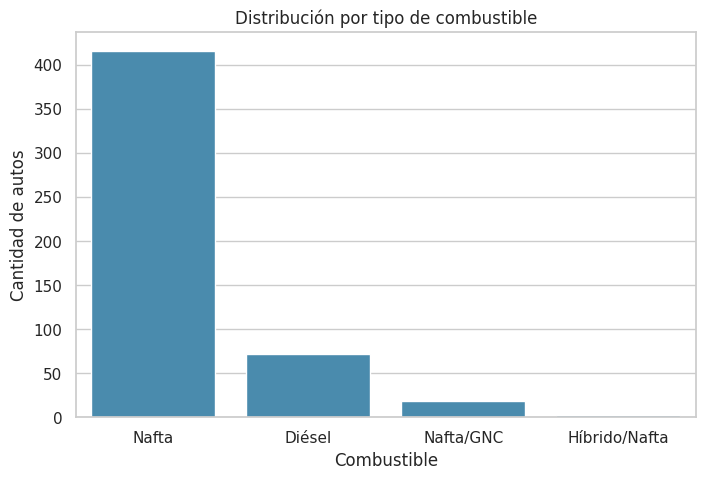

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='combustible', order=df['combustible'].value_counts().index)
plt.title("Distribuci√≥n por tipo de combustible")
plt.xlabel("Combustible")
plt.ylabel("Cantidad de autos")
plt.show()

**Conclusi√≥n**

Se observa una clara predominancia de autos que funcionan con **Nafta**, seguidos a gran distancia por los que usan **Di√©sel** o combinaciones como **Nafta/GNC**. Los autos **h√≠bridos** son pr√°cticamente inexistentes en esta muestra. Esto sugiere que la mayor√≠a de los veh√≠culos analizados a√∫n se encuentran lejos de tecnolog√≠as m√°s modernas o sustentables.

## 4.5 Relaci√≥n entre tipo de carrocer√≠a y caja de cambios

En este apartado se busca identificar c√≥mo var√≠a la distribuci√≥n del tipo de transmisi√≥n (manual, autom√°tica) seg√∫n el tipo de carrocer√≠a del veh√≠culo. Este an√°lisis permite detectar patrones de preferencia o disponibilidad de transmisiones asociadas a ciertos estilos de veh√≠culos.


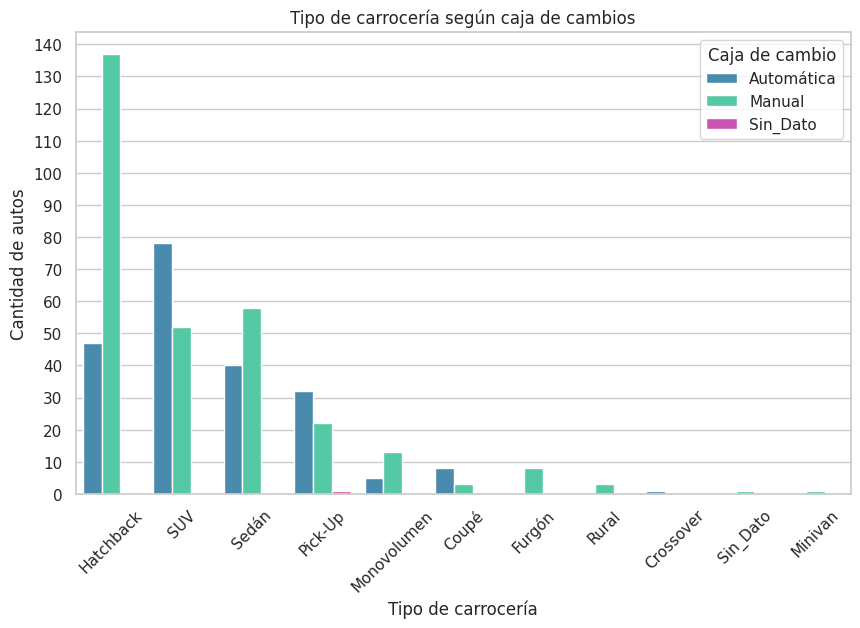

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='tipo de cuerpo',
    hue='caja de cambio',
    order=df['tipo de cuerpo'].value_counts().index,
    palette=["#3990BE", "#42DBAD", "#E03FB9"]
)
plt.title("Tipo de carrocer√≠a seg√∫n caja de cambios")
plt.xlabel("Tipo de carrocer√≠a")
plt.ylabel("Cantidad de autos")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 141, 10))  # Hasta 140 de a 10
plt.legend(title='Caja de cambio')
plt.show()


**Conclusi√≥n**

Se observa una **clara preferencia por transmisiones manuales** en la mayor√≠a de las carrocer√≠as, en especial en los **Hatchbacks y Sedanes**. Por otro lado, las **SUVs y Pick-Ups** presentan una proporci√≥n m√°s equilibrada entre manuales y autom√°ticas. Las carrocer√≠as menos frecuentes tienen menor representatividad pero tambi√©n tienden a ser mayoritariamente manuales. El an√°lisis refuerza la hip√≥tesis de que el tipo de caja est√° asociado a la categor√≠a del veh√≠culo y su orientaci√≥n de uso (urbano, familiar o utilitario).


## 4.6 Distribuci√≥n por cantidad de puertas
A continuaci√≥n analizamos c√≥mo se distribuyen los veh√≠culos en la base de datos seg√∫n la cantidad de puertas que poseen. Esta variable puede relacionarse con el tipo de veh√≠culo (por ejemplo, sedanes, SUVs, coup√©s, etc.), y nos da una idea general de las configuraciones m√°s comunes.

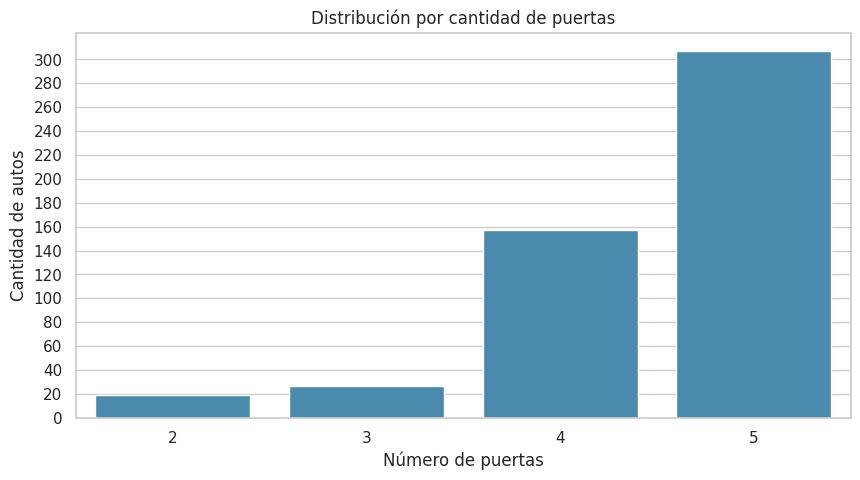

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='puertas', order=sorted(df['puertas'].unique()), color="#3990BE")
plt.title("Distribuci√≥n por cantidad de puertas")
plt.xlabel("N√∫mero de puertas")
plt.ylabel("Cantidad de autos")
plt.yticks(np.arange(0, 301, 20))
plt.show()

**Conclusi√≥n**

Se observa que la mayor√≠a de los veh√≠culos tienen 4 o 5 puertas, lo cual es esperable dado que estos formatos son los m√°s comunes en autos familiares, utilitarios y SUV. Las configuraciones con 2 puertas son mucho menos frecuentes, posiblemente asociadas a modelos coup√© o deportivos. Esta variable podr√≠a ser √∫til para identificar segmentos de veh√≠culos seg√∫n su dise√±o o funcionalidad.

## 4.7 Relaci√≥n entre kilometraje y precio
En esta secci√≥n vamos a explorar si existe una relaci√≥n significativa entre los kil√≥metros recorridos por un veh√≠culo y su precio en d√≥lares. La l√≥gica sugiere que, a mayor uso (mayor kilometraje), el precio deber√≠a tender a ser m√°s bajo. Sin embargo, es importante visualizar si esto realmente se manifiesta en el dataset disponible, y si hay patrones u outliers que puedan sesgar los resultados.



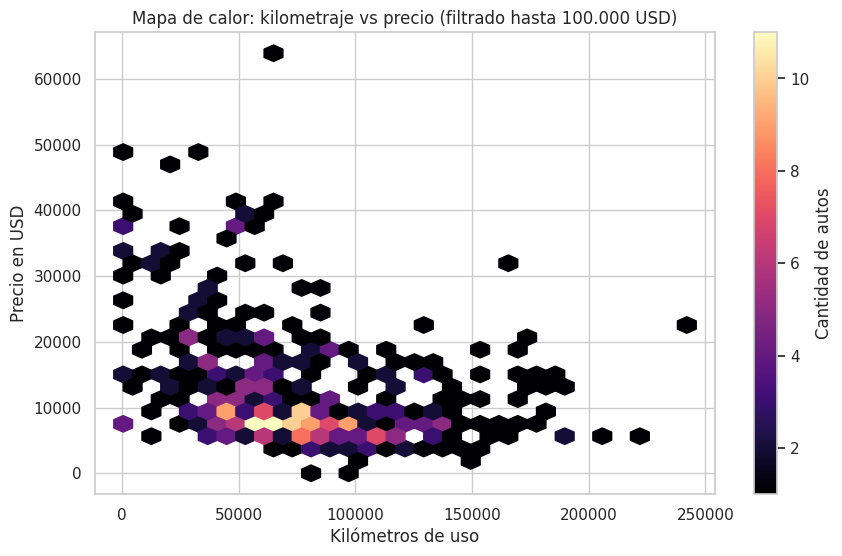

In [ ]:
plt.figure(figsize=(10,6))
df_filtrado = df[df['Precio Dolarizado'] <= 100000]  # L√≠mite superior razonable
plt.hexbin(df_filtrado['kilometros de uso'],df_filtrado['Precio Dolarizado'],gridsize=30,cmap="magma",mincnt=1)
plt.colorbar(label='Cantidad de autos')
plt.title("Mapa de calor: kilometraje vs precio (filtrado hasta 100.000 USD)")
plt.xlabel("Kil√≥metros de uso")
plt.ylabel("Precio en USD")
plt.grid(True)
plt.show()

**Conclusi√≥n**

Se confirma una tendencia esperada: los veh√≠culos con menor kilometraje concentran los precios m√°s altos, mientras que los de mayor uso tienden a ubicarse en rangos m√°s bajos de precio.

Adem√°s, el mapa de calor destaca zonas de alta densidad de autos econ√≥micos con uso moderado, lo cual es informaci√≥n clave para entrenar modelos de predicci√≥n m√°s precisos, eliminar outliers y ajustar rangos realistas en los modelos de regresi√≥n o clasificaci√≥n.


## 4.8 Combustible y precio
La relaci√≥n entre el tipo de combustible y el precio de los autos puede revelar patrones importantes para la segmentaci√≥n del mercado y la identificaci√≥n de productos premium o econ√≥micos. Este an√°lisis busca explorar c√≥mo var√≠a el precio de los autos seg√∫n el combustible que utilizan, considerando adem√°s la distribuci√≥n y dispersi√≥n de estos valores para cada categor√≠a.

/tmp/ipython-input-14-2993957016.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_heat.pivot_table(index='combustible',columns='Precio Bin',aggfunc='size',fill_value=0)


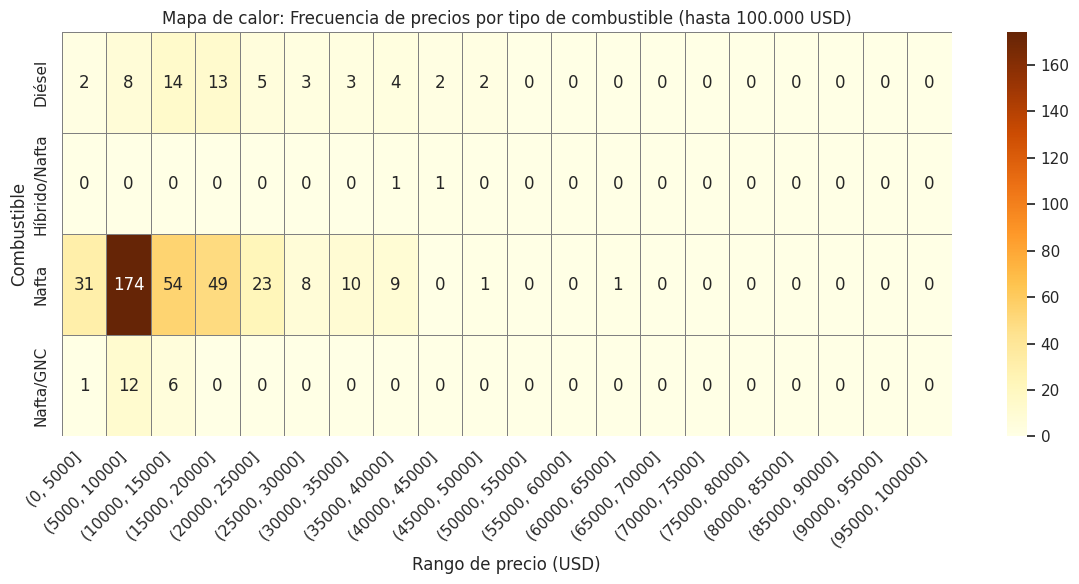

In [ ]:
# Agrupar los precios en bins definidos manualmente
price_bins = pd.interval_range(start=0, end=100000, freq=5000)
df_heat = df[df['Precio Dolarizado'] < 100000].copy()
df_heat['Precio Bin'] = pd.cut(df_heat['Precio Dolarizado'], bins=price_bins)
# Crear tabla de frecuencia cruzada entre tipo de combustible y rango de precio
heatmap_data = df_heat.pivot_table(index='combustible',columns='Precio Bin',aggfunc='size',fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlOrBr", linewidths=0.5, linecolor='gray', annot=True, fmt="d")
plt.title("Mapa de calor: Frecuencia de precios por tipo de combustible (hasta 100.000 USD)")
plt.xlabel("Rango de precio (USD)")
plt.ylabel("Combustible")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Conclusi√≥n**
El mapa de calor muestra con claridad que la mayor√≠a de los autos a la venta utilizan nafta como combustible y se concentran fuertemente en los rangos de precio entre 5.000 y 20.000 USD.

En segundo lugar, aunque en menor proporci√≥n, aparecen veh√≠culos di√©sel, con una distribuci√≥n algo m√°s dispersa pero tambi√©n centrada en precios bajos.
Los autos con GNC o tecnolog√≠a h√≠brida representan una fracci√≥n muy peque√±a del mercado.

Este patr√≥n puede ser clave al momento de dise√±ar un modelo predictivo: el tipo de combustible podr√≠a tener una influencia significativa sobre el precio, aunque su poder explicativo variar√° seg√∫n el segmento. Tambi√©n deja en evidencia un fuerte desbalance entre clases que podr√≠a ser relevante si se opta por clasificar o segmentar por tipo de combustible.


## 4.9 Distribuci√≥n de precios por tipo de caja de cambios:
El tipo de transmisi√≥n (manual o autom√°tica) es una caracter√≠stica relevante que puede influir en el precio de un veh√≠culo. Los autos con caja autom√°tica suelen estar asociados a modelos m√°s nuevos o de mayor gama, mientras que la transmisi√≥n manual es m√°s com√∫n en modelos econ√≥micos o utilitarios. Visualizar c√≥mo var√≠a el precio en funci√≥n del tipo de caja puede ayudarnos a detectar diferencias clave entre segmentos y orientar decisiones en la construcci√≥n del modelo predictivo.

/tmp/ipython-input-15-3645203770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['Precio Dolarizado'] <= 100000],x='caja de cambio', y='Precio Dolarizado', palette=["#3990BE", "#42DBAD", "#E03FB9"], inner='quartile',linewidth=1)
/tmp/ipython-input-15-3645203770.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.violinplot(data=df[df['Precio Dolarizado'] <= 100000],x='caja de cambio', y='Precio Dolarizado', palette=["#3990BE", "#42DBAD", "#E03FB9"], inner='quartile',linewidth=1)


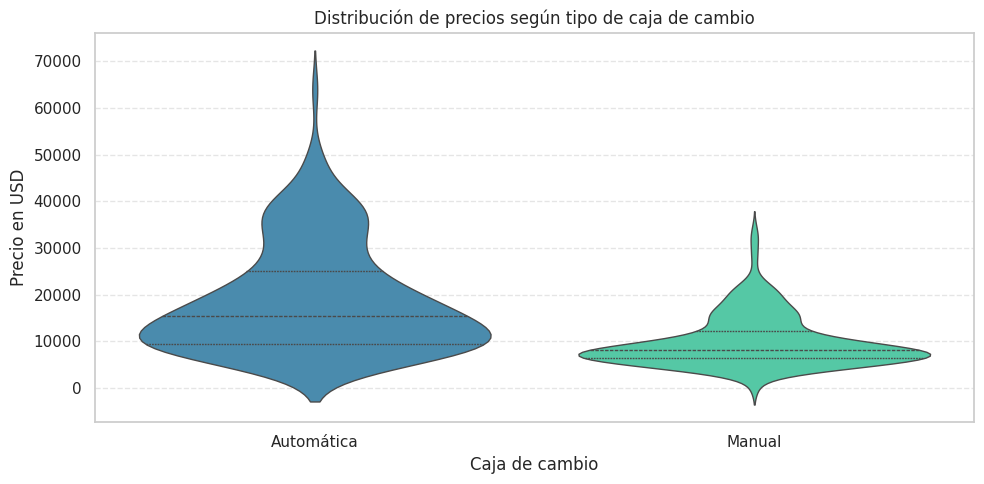

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df[df['Precio Dolarizado'] <= 100000],x='caja de cambio', y='Precio Dolarizado', palette=["#3990BE", "#42DBAD", "#E03FB9"], inner='quartile',linewidth=1)
plt.title("Distribuci√≥n de precios seg√∫n tipo de caja de cambio")
plt.xlabel("Caja de cambio")
plt.ylabel("Precio en USD")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Conclusi√≥n**

El gr√°fico revela que los autos con caja autom√°tica tienden a tener precios m√°s altos en comparaci√≥n con los de caja manual, lo cual es esperable ya que suelen corresponder a veh√≠culos m√°s modernos o de mayor confort.
Tambi√©n se observa una mayor variabilidad de precios en los autom√°ticos, mientras que los autos manuales presentan una distribuci√≥n m√°s concentrada en el rango bajo.

## 4.10 Evoluci√≥n del precio promedio por a√±o (por marca)
Analizar el comportamiento del precio promedio por a√±o, separado por marca, las marcas m√°s tendenciosas en nuestra regi√≥n, permite identificar c√≥mo se ha valorizado o depreciado cada fabricante a lo largo del tiempo. Esta informaci√≥n puede resultar √∫til para interpretar tendencias del mercado o preparar un modelo de regresi√≥n m√°s realista.

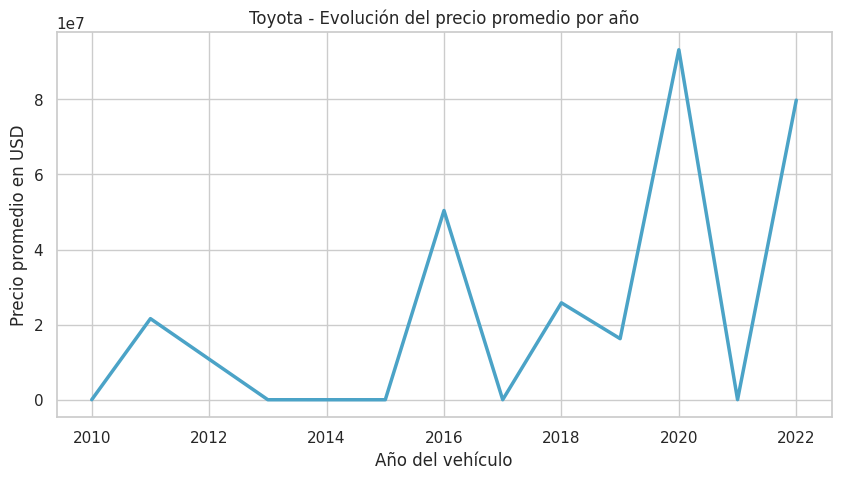

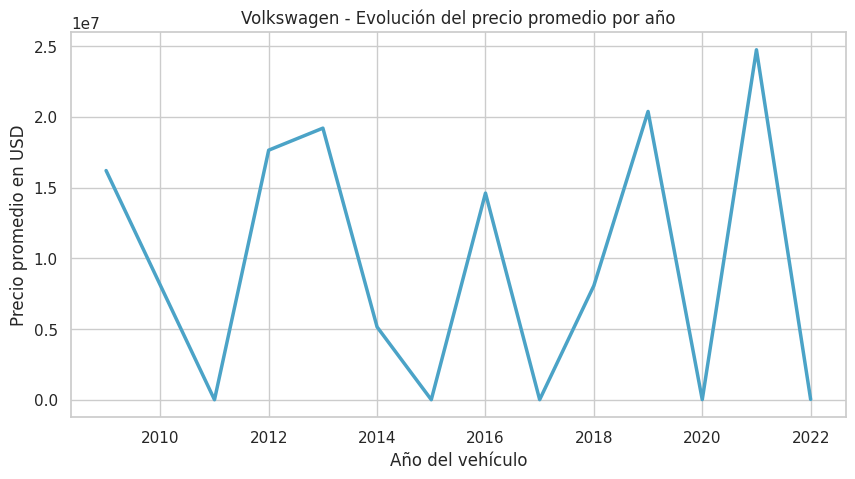

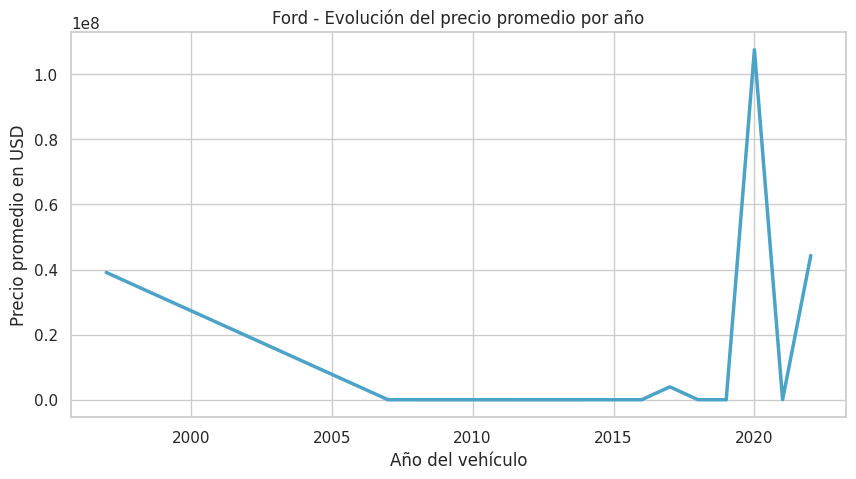

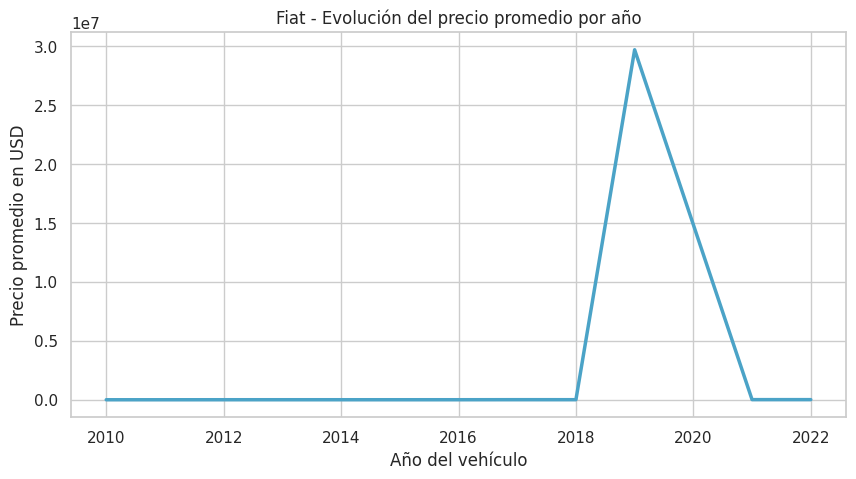

In [ ]:
# Toyota
df_toyota = df[df['marca'] == 'Toyota']
df_toyota_group = df_toyota.groupby('a√±o')['Precio Dolarizado'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=df_toyota_group, x='a√±o', y='Precio Dolarizado', color="#4BA3C7", linewidth=2.5)
plt.title("Toyota - Evoluci√≥n del precio promedio por a√±o")
plt.xlabel("A√±o del veh√≠culo")
plt.ylabel("Precio promedio en USD")
plt.grid(True)
plt.show()
# Volkswagen
df_vw = df[df['marca'] == 'Volkswagen']
df_vw_group = df_vw.groupby('a√±o')['Precio Dolarizado'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=df_vw_group, x='a√±o', y='Precio Dolarizado', color="#4BA3C7", linewidth=2.5)
plt.title("Volkswagen - Evoluci√≥n del precio promedio por a√±o")
plt.xlabel("A√±o del veh√≠culo")
plt.ylabel("Precio promedio en USD")
plt.grid(True)
plt.show()
# Ford
df_ford = df[df['marca'] == 'Ford']
df_ford_group = df_ford.groupby('a√±o')['Precio Dolarizado'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=df_ford_group, x='a√±o', y='Precio Dolarizado', color="#4BA3C7", linewidth=2.5)
plt.title("Ford - Evoluci√≥n del precio promedio por a√±o")
plt.xlabel("A√±o del veh√≠culo")
plt.ylabel("Precio promedio en USD")
plt.grid(True)
plt.show()
# Fiat
df_fiat = df[df['marca'] == 'Fiat']
df_fiat_group = df_fiat.groupby('a√±o')['Precio Dolarizado'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=df_fiat_group, x='a√±o', y='Precio Dolarizado', color="#4BA3C7", linewidth=2.5)
plt.title("Fiat - Evoluci√≥n del precio promedio por a√±o")
plt.xlabel("A√±o del veh√≠culo")
plt.ylabel("Precio promedio en USD")
plt.grid(True)
plt.show()

**Conclusi√≥n**
Las cuatro marcas analizadas muestran patrones de evoluci√≥n distintos:

Toyota mantiene una tendencia de precios estables o en leve aumento en los √∫ltimos a√±os, con valores promedio generalmente m√°s altos.

Volkswagen presenta una curva m√°s variable, pero con repuntes de precio en a√±os recientes.

Ford muestra una ca√≠da en el precio promedio en algunos a√±os, probablemente por modelos m√°s antiguos o baja demanda.

Fiat, con precios generalmente m√°s bajos, tambi√©n mantiene cierta estabilidad, lo que podr√≠a estar relacionado con su segmento de mercado m√°s econ√≥mico.

Este tipo de an√°lisis por marca es fundamental para capturar el comportamiento heterog√©neo del mercado automotor argentino.

## 4.11 las 10 marcas con los autos m√°s caros del dataset:
En base al precio m√°ximo registrado para cada una. Es √∫til para observar qu√© marcas manejan valores extremos en el mercado de autos usados en Argentina, lo cual tambi√©n puede revelar outliers o inconsistencias a tener en cuenta para el modelado posterior.

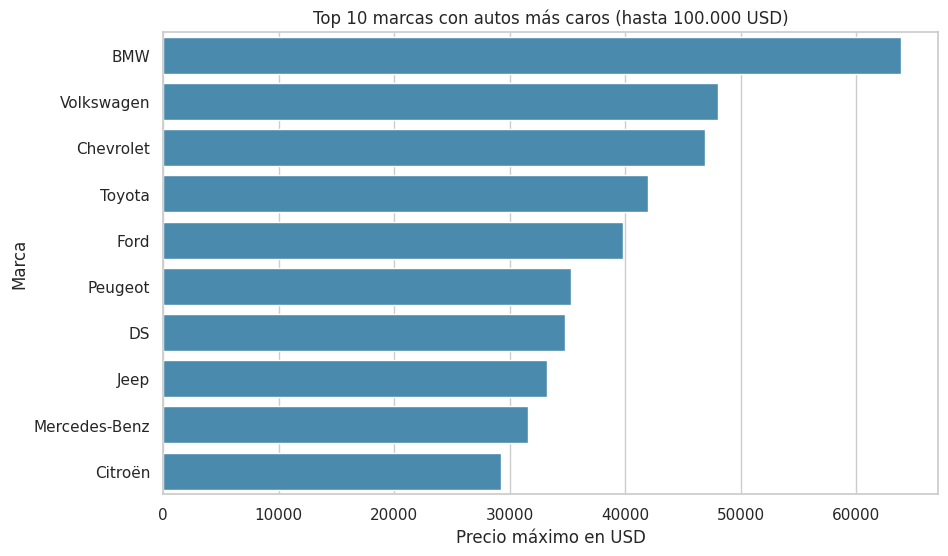

In [ ]:
# Filtramos solo autos con precios realistas (hasta 100.000 USD)
df_filtrado = df[df['Precio Dolarizado'] <= 100000]
# Calculamos el precio m√°ximo por marca dentro de ese rango
top_precios_filtrados = df_filtrado.groupby('marca')['Precio Dolarizado'] \
                                   .max().sort_values(ascending=False).head(10)
# Gr√°fico
plt.figure(figsize=(10,6))
sns.barplot(x=top_precios_filtrados.values, y=top_precios_filtrados.index)
plt.title("Top 10 marcas con autos m√°s caros (hasta 100.000 USD)")
plt.xlabel("Precio m√°ximo en USD")
plt.ylabel("Marca")
plt.show()

**Conclusi√≥n**
Luego de eliminar precios fuera de rango (mayores a 100.000 USD), se observa que marcas como BMW, Audi, Mercedes-Benz y Ford contin√∫an posicion√°ndose entre las m√°s costosas dentro del mercado argentino de autos usados.

Este gr√°fico refleja mejor la realidad comercial de veh√≠culos de gama media y alta, sin la distorsi√≥n de outliers. Resulta m√°s √∫til para el an√°lisis predictivo, ya que evita valores que podr√≠an generar sobreajustes en los modelos o conclusiones err√≥neas sobre la relaci√≥n entre marca y precio.

## 4.12 Precio seg√∫n Carrocer√≠a
El objetivo de este gr√°fico es visualizar c√≥mo var√≠a el precio promedio en d√≥lares seg√∫n el tipo de carrocer√≠a de los veh√≠culos presentes en el dataset. Utilizando un mapa de calor en gama de azules, se logra representar de forma clara y comparativa qu√© tipos de carrocer√≠a concentran valores m√°s altos o m√°s bajos. Esta informaci√≥n resulta especialmente √∫til para entender tendencias de mercado y segmentaci√≥n por estilo de veh√≠culo.

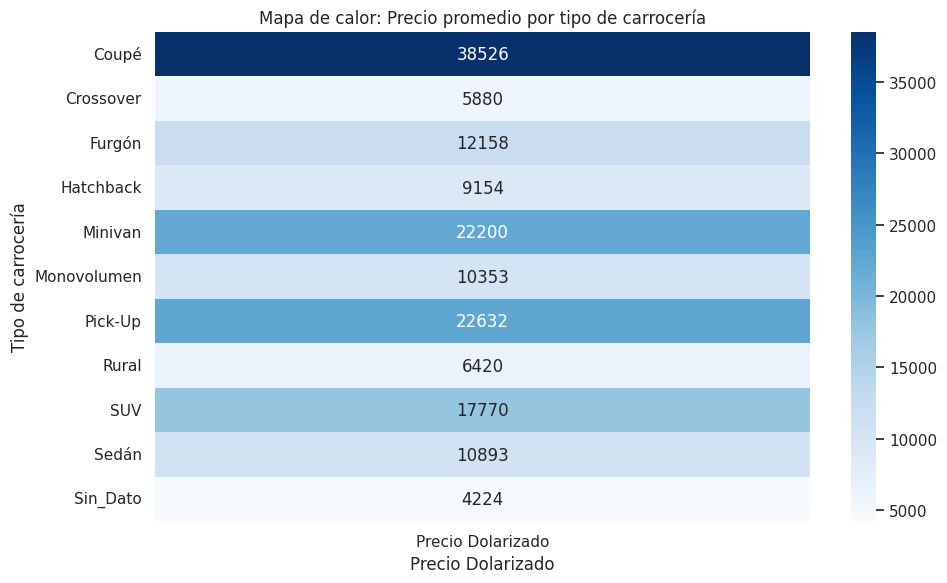

In [ ]:
df_heat = df.copy()
df_heat = df_heat[df_heat['Precio Dolarizado'] <= 100000]  # Filtro si lo est√°s usando
precio_promedio = df_heat.groupby('tipo de cuerpo')['Precio Dolarizado'].mean().reset_index()
# Pivot para heatmap
heatmap_data = precio_promedio.pivot_table(index='tipo de cuerpo', values='Precio Dolarizado')
# Gr√°fico
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Blues", cbar=True)
plt.title("Mapa de calor: Precio promedio por tipo de carrocer√≠a")
plt.xlabel("Precio Dolarizado")
plt.ylabel("Tipo de carrocer√≠a")
plt.tight_layout()
plt.show()

**Conclusi√≥n**
Se observa que la carrocer√≠a Coup√© presenta el precio promedio m√°s alto, con 80.000 USD, lo que puede atribuirse a su orientaci√≥n deportiva o de lujo. Por otro lado, las carrocer√≠as Hatchback, Sed√°n y Minivan se encuentran entre las opciones m√°s accesibles. Las Pick-Up y SUV tambi√©n muestran precios elevados, lo cual es consistente con su tama√±o, robustez y equipamiento.
El mapa de calor permite detectar estas diferencias de forma inmediata y evidencia c√≥mo el dise√±o del veh√≠culo impacta en su valor de mercado.

## 4.13 relaci√≥n entre el tipo de motor de los veh√≠culos y su precio promedio en d√≥lares
Este gr√°fico busca analizar la relaci√≥n entre el tipo de motor de los veh√≠culos y su precio promedio en d√≥lares. Agrupar esta informaci√≥n permite detectar cu√°les son los tipos de motorizaci√≥n que tienden a tener un mayor valor en el mercado, lo que puede ser √∫til tanto para compradores como para desarrolladores de modelos predictivos.

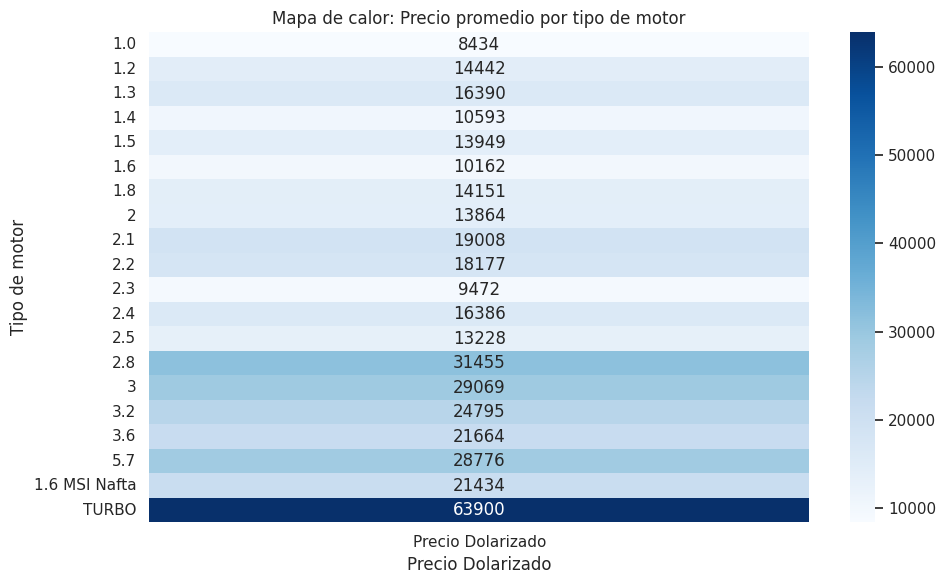

In [ ]:
# Copiamos y filtramos precios exagerados (opcional, pero recomendable)
df_heat = df.copy()
df_heat = df_heat[df_heat['Precio Dolarizado'] <= 100000]
# Quitamos los datos faltantes de 'motor'
df_heat = df_heat[df_heat['motor'] != 'Sin_Dato']
# Agrupamos por tipo de motor y calculamos el precio promedio
precio_prom_motor = df_heat.groupby('motor')['Precio Dolarizado'].mean().reset_index()
# Pivot para el heatmap
heatmap_data = precio_prom_motor.pivot_table(index='motor', values='Precio Dolarizado')
# Graficamos
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Blues", cbar=True)
plt.title("Mapa de calor: Precio promedio por tipo de motor")
plt.xlabel("Precio Dolarizado")
plt.ylabel("Tipo de motor")
plt.tight_layout()
plt.show()

**Conclusi√≥n**
La visualizaci√≥n revela diferencias importantes en los precios promedio seg√∫n el tipo de motor. Los motores m√°s complejos o de mayor cilindrada tienden a estar asociados a veh√≠culos de mayor valor, mientras que los motores m√°s simples presentan precios m√°s accesibles. Este patr√≥n puede estar relacionado tanto con el rendimiento del veh√≠culo como con su segmento de mercado (utilitario, deportivo, econ√≥mico, etc.).

Adem√°s, este tipo de an√°lisis permite detectar valores at√≠picos o inconsistencias en la carga de datos, y brinda un insumo clave para tareas de modelado y toma de decisiones.

## **4.14 Matriz de correlaci√≥n extendida (num√©ricas + categ√≥ricas)**
Con el objetivo de analizar la relaci√≥n entre el precio dolarizado y el resto de las variables del dataset, ampliamos el an√°lisis de correlaci√≥n incluyendo variables categ√≥ricas transformadas, como combustible, caja de cambio y tipo de carrocer√≠a. Esto nos permite tener una visi√≥n m√°s completa de c√≥mo se comportan entre s√≠ las distintas caracter√≠sticas de los veh√≠culos.

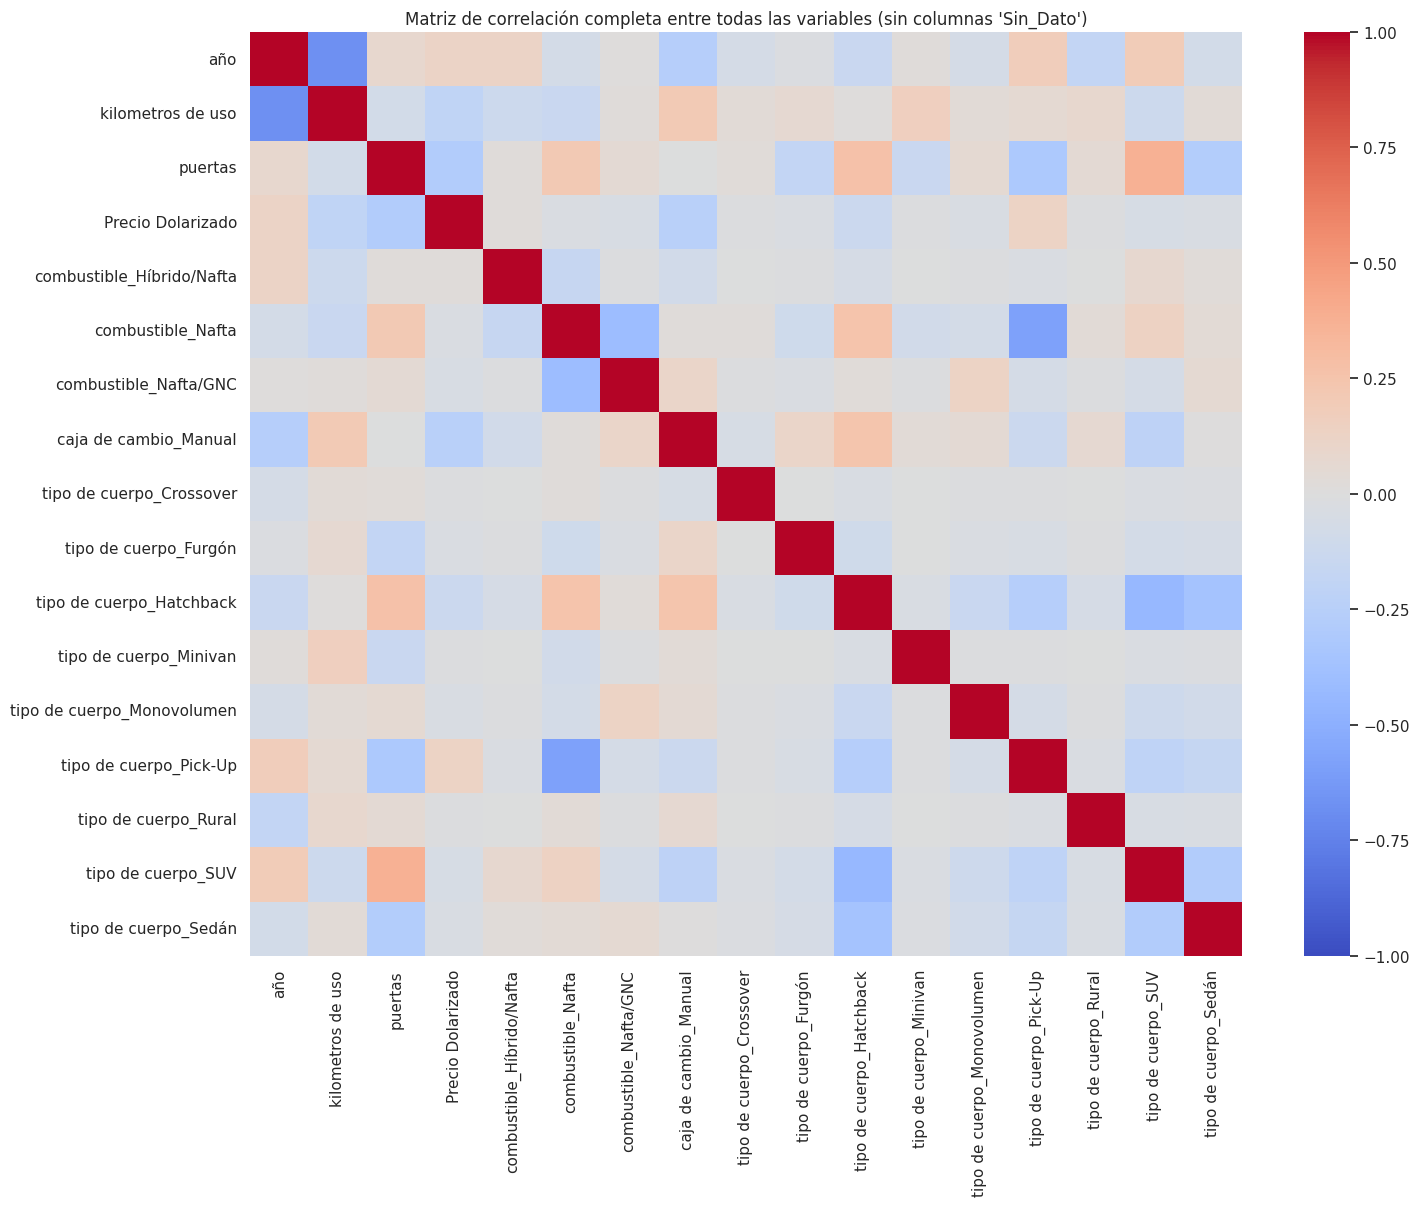

In [ ]:
# Creamos un nuevo DataFrame con variables num√©ricas y categ√≥ricas
df_corr = df[['a√±o', 'kilometros de uso', 'puertas', 'Precio Dolarizado','combustible', 'caja de cambio', 'tipo de cuerpo']].copy()
# Convertimos las variables categ√≥ricas en variables dummies (sin incluir la categor√≠a base)
df_dummies = pd.get_dummies(df_corr[['combustible', 'caja de cambio', 'tipo de cuerpo']], drop_first=True)
# Eliminamos las columnas que contienen "Sin_Dato"
df_dummies = df_dummies.loc[:, ~df_dummies.columns.str.contains("Sin_Dato")]
# Unimos el DataFrame original con los dummies
df_corr = pd.concat([df_corr.drop(columns=['combustible', 'caja de cambio', 'tipo de cuerpo']), df_dummies], axis=1)
# Graficamos la matriz de correlaci√≥n completa
plt.figure(figsize=(16,12))
sns.heatmap(df_corr.corr(), cmap='coolwarm', annot=False, fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de correlaci√≥n completa entre todas las variables (sin columnas 'Sin_Dato')")
plt.show()

**Conclusi√≥n**

La matriz de correlaci√≥n completa muestra que las variables num√©ricas y dummies incluidas en el an√°lisis tienen, en general, baja correlaci√≥n con el precio.
Las correlaciones m√°s destacadas son:

>**Kil√≥metros de uso**: presenta una correlaci√≥n negativa moderada con el precio (~ -0.20), indicando que a mayor uso, menor valor de mercado.

>**A√±o**: muestra una correlaci√≥n levemente positiva (~ 0.12), lo que sugiere que los modelos m√°s nuevos tienden a ser m√°s caros.

*El resto de las variables*, incluyendo puertas, combustible, tipo de cuerpo y caja de cambio, tienen correlaciones muy bajas, por lo que su influencia directa sobre el precio parece limitada.

Este tipo de an√°lisis nos ayuda a priorizar variables relevantes para futuros modelos predictivos y a detectar relaciones poco significativas o redundantes.

## **4.15 precio promedio dolarizado de veh√≠culos**
En este an√°lisis comparamos el precio promedio dolarizado de veh√≠culos filtrando por dos aspectos claves:

Marca (limit√°ndonos a las 4 m√°s relevantes del dataset: Toyota, Volkswagen, Fiat y Ford).

Estado del veh√≠culo, clasificado como Nuevo si tiene menos de 1.000 km, o Usado en caso contrario.

Para evitar sesgos por valores extremos (outliers), se aplic√≥ un filtro adicional a los datos, conservando √∫nicamente los veh√≠culos con precios inferiores a 100.000 USD, buscando representar el mercado real de forma m√°s fiel.

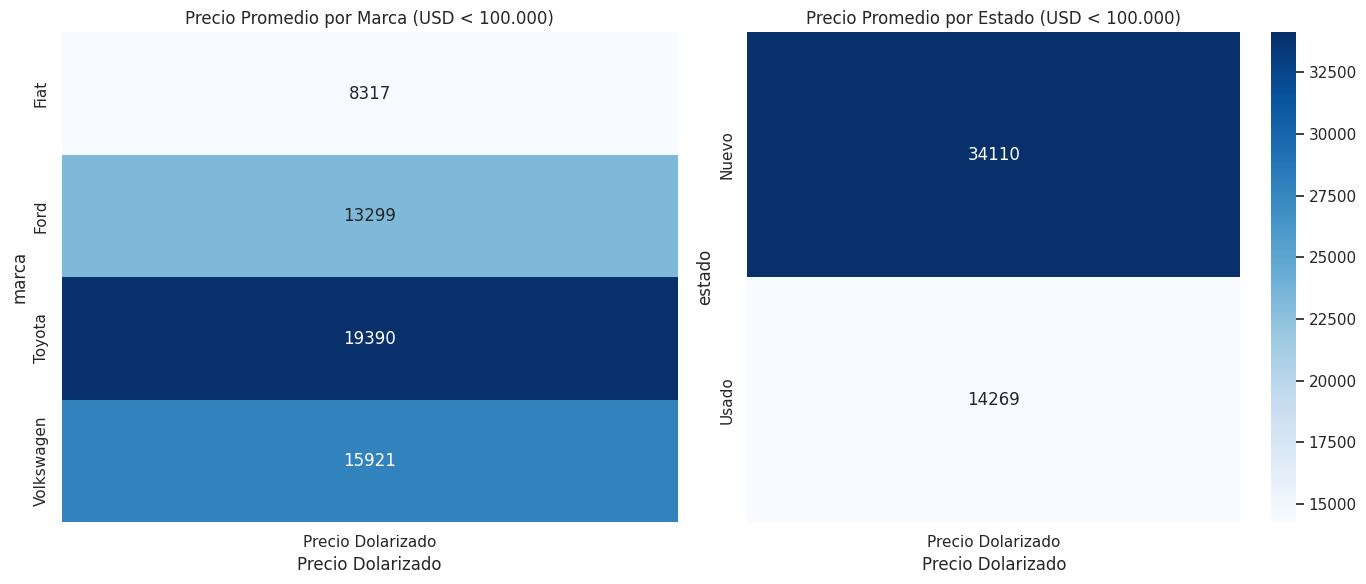

In [ ]:
# Paso 1: Filtro de marcas, precio y creaci√≥n de variable estado
marcas_interes = ['Toyota', 'Volkswagen', 'Ford', 'Fiat']
df_filtrado = df[(df['marca'].isin(marcas_interes)) & (df['Precio Dolarizado'] < 100000)].copy()
df_filtrado['estado'] = df_filtrado['kilometros de uso'].apply(lambda x: 'Nuevo' if x <= 1000 else 'Usado')
# Paso 2: Agrupaciones
marca_pivot = df_filtrado.groupby('marca')['Precio Dolarizado'].mean().reset_index().pivot_table(index='marca', values='Precio Dolarizado')
estado_pivot = df_filtrado.groupby('estado')['Precio Dolarizado'].mean().reset_index().pivot_table(index='estado', values='Precio Dolarizado')
# Paso 3: Mapas de calor
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(marca_pivot, cmap="Blues", annot=True, fmt=".0f", ax=axes[0], cbar=False)
axes[0].set_title("Precio Promedio por Marca (USD < 100.000)")
axes[0].set_xlabel("Precio Dolarizado")
sns.heatmap(estado_pivot, cmap="Blues", annot=True, fmt=".0f", ax=axes[1])
axes[1].set_title("Precio Promedio por Estado (USD < 100.000)")
axes[1].set_xlabel("Precio Dolarizado")
plt.tight_layout()
plt.show()

**Conclusi√≥n**

Los gr√°ficos muestran con claridad que:

Toyota tiene el precio promedio m√°s alto entre las marcas analizadas, seguido de cerca por Volkswagen y Ford. Fiat, en cambio, se posiciona como la m√°s econ√≥mica en promedio.

Al comparar por estado del veh√≠culo, se observa una diferencia significativa:
los autos nuevos tienen un precio promedio de alrededor de 34.000 USD, mientras que los usados promedian 14.000 USD, lo cual es coherente con la depreciaci√≥n natural por uso.

Este an√°lisis permite entender la influencia de la marca y del estado sobre el valor de mercado de los autos en Argentina y ser√° √∫til para futuras tareas de modelado o predicci√≥n.

#**5. Modelos de regresi√≥n:**

En esta secci√≥n se implementa un modelo de regresi√≥n lineal simple con el objetivo de predecir el precio dolarizado de los veh√≠culos.
Para ello, seleccionamos tres variables num√©ricas con buena relevancia seg√∫n el an√°lisis previo:

>**a√±o**

>**kil√≥metros de uso**

> **tipo de cuerpo_SUV**

El procedimiento consiste en:

Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)

Entrenar el modelo con los datos conocidos

Evaluar el rendimiento del modelo con m√©tricas est√°ndar de regresi√≥n:

MAE (Error Absoluto Medio)

MSE (Error Cuadr√°tico Medio)

R¬≤ (Coeficiente de Determinaci√≥n)



üìä Resultados del modelo (precios en d√≥lares, sin log, sin Pick-Up):
MAE: 2988.7999057462903
MSE: 19750791.120326523
R¬≤: 0.7071088771484461


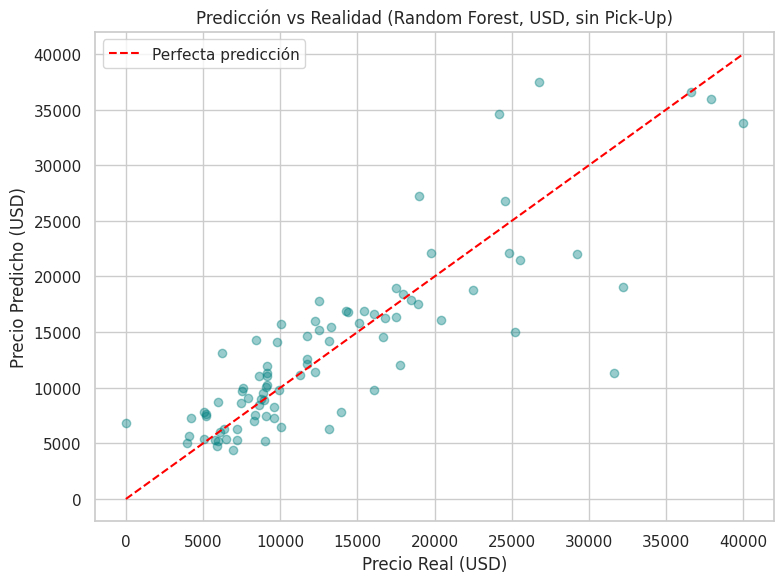

In [39]:
columnas_categoricas = ['tipo de cuerpo', 'combustible', 'caja de cambio']
df_dummies = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Filtramos autos con precios extremos (mayores a 40 mil d√≥lares)
df_dummies = df_dummies[df_dummies['Precio Dolarizado'] < 40_000]

#Definimos las variables seleccionadas (excluyendo tipo de cuerpo_Pick-Up)
columnas_modelo = [
    'a√±o',
    'tipo de cuerpo_SUV',
    'tipo de cuerpo_Sed√°n',
    'tipo de cuerpo_Hatchback',
    'tipo de cuerpo_Crossover',
    'kilometros de uso',
    'combustible_H√≠brido/Nafta',
    'caja de cambio_Manual'
]

#Verificamos que existan en el DataFrame
columnas_existentes = [col for col in columnas_modelo if col in df_dummies.columns]
X = df_dummies[columnas_existentes]
y = df_dummies['Precio Dolarizado']  # Ahora s√≠ usamos directamente el precio en d√≥lares

#Divisi√≥n en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenamos el modelo
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

#Predicciones
y_pred = modelo_rf.predict(X_test)

#M√©tricas
print("\nüìä Resultados del modelo (precios en d√≥lares, sin log, sin Pick-Up):")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R¬≤:", r2_score(y_test, y_pred))

#Gr√°fico de dispersi√≥n
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfecta predicci√≥n")
plt.xlabel('Precio Real (USD)')
plt.ylabel('Precio Predicho (USD)')
plt.title('Predicci√≥n vs Realidad (Random Forest, USD, sin Pick-Up)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Conclusi√≥n**

El gr√°fico de dispersi√≥n entre el precio real y el precio predicho muestra un desempe√±o razonablemente bueno en el rango de 5.000 a 20.000 USD, donde se concentra la mayor parte de los autos del dataset. Dentro de ese segmento, el modelo logra realizar predicciones cercanas al valor real, con un margen de error promedio de aproximadamente 3.000 USD.

Sin embargo, a medida que se incrementa el valor del veh√≠culo (especialmente entre los 30.000 y 40.000 USD), se observa una mayor dispersi√≥n en las predicciones. Esto indica que el modelo no cuenta con suficiente representaci√≥n de autos premium para distinguir correctamente sus caracter√≠sticas, lo cual reduce su capacidad predictiva en ese rango. A pesar de ello, no se evidencian errores catastr√≥ficos; el modelo no predice valores completamente alejados de la realidad, lo que demuestra cierta solidez estructural.

A partir de esta experiencia, se identifican varias herramientas te√≥ricas aprendidas en el curso que podr√≠an implementarse para mejorar los resultados:

- **Segmentaci√≥n por rangos de precio:** entrenar modelos separados para veh√≠culos econ√≥micos y de alta gama.
- **Ingenier√≠a de caracter√≠sticas:** derivar nuevas variables como los a√±os del auto, la relaci√≥n entre uso y a√±o, o variables compuestas que reflejen atributos t√©cnicos.
- **An√°lisis de outliers y revisi√≥n sem√°ntica:** explorar marcas o modelos mal categorizados o con muy poca representaci√≥n.
- **Balanceo del conjunto de datos:** incorporar m√°s observaciones representativas de veh√≠culos caros o poco frecuentes.

En s√≠ntesis, este modelo permiti√≥ comprobar que, a√∫n con un conjunto de variables relativamente simple, se puede obtener una capacidad predictiva aceptable. Adem√°s, demostr√≥ que los resultados pueden mejorar sustancialmente al tratar con datos consistentes, representativos y adecuadamente preprocesados. Esta versi√≥n final ofrece un punto de partida s√≥lido para futuras iteraciones y pruebas m√°s avanzadas.


#**6. Conclusi√≥n final**
A lo largo del desarrollo de este trabajo final, se recorrieron todas las etapas fundamentales de machine learning aplicado a un problema de regresi√≥n con datos reales del mercado automotor argentino. Se parti√≥ de un an√°lisis exploratorio sencillo, donde se evalu√≥ la distribuci√≥n de las variables, su correlaci√≥n con el precio dolarizado, y se identificaron aquellas que pod√≠an tener valor predictivo.

Sse aplic√≥ un modelo de Random Forest, primero con transformaciones logar√≠tmicas del precio que terminaron afectando negativamente la performance, y luego con el precio directamente en d√≥lares, lo cual result√≥ ser una decisi√≥n m√°s acertada. La versi√≥n final del modelo, sin transformaci√≥n logar√≠tmica y usando solo las 8 variables m√°s correlacionadas, logr√≥ un desempe√±o considerablemente superior, con un R¬≤ ‚âà 0.71 y un MAE de alrededor de 3.000 USD.

Este resultado demuestra no solo que el modelo puede ser √∫til para estimar precios en rangos razonables, sino que el aprendizaje obtenido sobre la calidad de los datos, el tratamiento de variables categ√≥ricas, la segmentaci√≥n, y la correcta selecci√≥n de m√©tricas, es tan valioso como el ajuste en s√≠. El an√°lisis tambi√©n permiti√≥ identificar limitaciones estructurales, como el desbalance en la representaci√≥n de autos de alta gama, y abri√≥ la puerta a futuras mejoras como la segmentaci√≥n de modelos, la ingenier√≠a de nuevas variables, y la recolecci√≥n dirigida de datos.

Se aplicaron t√©cnicas de reducci√≥n de variables, se entren√≥ y evalu√≥ un modelo de regresi√≥n, se interpretaron m√©tricas clave y se extrajeron conclusiones basadas en evidencia.